In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titles=pd.read_csv('titles.csv')
titles=titles[titles.release_year>2000]
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
216,ts4,Breaking Bad,SHOW,"When Walter White, a New Mexico chemistry teac...",2008,TV-MA,48,"['drama', 'crime', 'thriller']",['US'],5.0,tt0903747,9.5,1775990.0,353.848,8.790
217,ts20371,Top Gear,SHOW,This fast-paced and stunt-filled motor show te...,2002,TV-PG,58,"['comedy', 'reality', 'european', 'music']",['GB'],32.0,tt1628033,8.7,117240.0,45.549,7.400
218,ts9,The Walking Dead,SHOW,Sheriff's deputy Rick Grimes awakens from a co...,2010,TV-MA,46,"['action', 'drama', 'scifi', 'horror', 'thrill...",['US'],11.0,tt1520211,8.2,956604.0,597.277,8.100
219,ts21465,Supernatural,SHOW,"When they were boys, Sam and Dean Winchester l...",2005,TV-14,45,"['scifi', 'horror', 'thriller', 'drama', 'fant...",['US'],15.0,tt0460681,8.4,434081.0,388.093,8.278
220,tm74402,The Mist,MOVIE,"After a violent storm, a dense cloud of mist e...",2007,R,126,"['horror', 'scifi', 'thriller']",['US'],NaN,tt0884328,7.1,305346.0,37.369,6.900


In [3]:
credits=pd.read_csv('credits.csv')
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [4]:
# join the teo dataset on id column
left=titles.set_index('id')
right=credits.set_index('id')
netflix_df=left.join(right,how='inner')
netflix_df.tail()

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
id,,,,,,,,,,,,,,,,,,
ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,31,"['animation', 'comedy', 'family']",['US'],1.0,tt6953650,6.5,97.0,3.420,NaN,6306,Carl Reiner,Santa (voice),ACTOR
ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,31,"['animation', 'comedy', 'family']",['US'],1.0,tt6953650,6.5,97.0,3.420,NaN,47007,Christopher Knights,Private (voice),ACTOR
ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,31,"['animation', 'comedy', 'family']",['US'],1.0,tt6953650,6.5,97.0,3.420,NaN,9233,Chris Rock,Marty (voice),ACTOR
ts98252,Dreamworks Happy Holidays from Madagascar,SHOW,Madagascar goes wild with holiday spirit in th...,2005,TV-PG,31,"['animation', 'comedy', 'family']",['US'],1.0,tt6953650,6.5,97.0,3.420,NaN,4678,Cedric the Entertainer,Maurice (voice),ACTOR
ts98316,Edge of the Universe,SHOW,Leading astronomers reveal the latest discover...,2002,TV-G,49,['documentation'],['GB'],1.0,tt6951568,7.2,208.0,1.139,NaN,4824,John Hurt,Narrator,ACTOR


In [5]:
netflix_df.drop(['description','imdb_id','person_id'],inplace=True,axis='columns')

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73345 entries, tm1000037 to ts98316
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 73344 non-null  object 
 1   type                  73345 non-null  object 
 2   release_year          73345 non-null  int64  
 3   age_certification     43232 non-null  object 
 4   runtime               73345 non-null  int64  
 5   genres                73345 non-null  object 
 6   production_countries  73345 non-null  object 
 7   seasons               14484 non-null  float64
 8   imdb_score            69442 non-null  float64
 9   imdb_votes            69355 non-null  float64
 10  tmdb_popularity       73334 non-null  float64
 11  tmdb_score            72247 non-null  float64
 12  name                  73345 non-null  object 
 13  character             63976 non-null  object 
 14  role                  73345 non-null  object 
dtypes: float64(5),

# which year hass the most number of movies released

<Axes: xlabel='count', ylabel='release_year'>

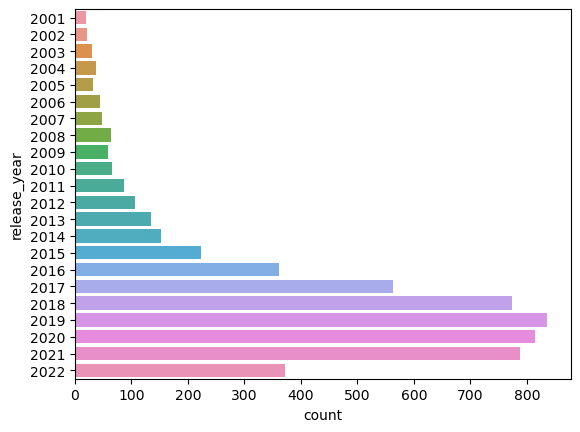

In [7]:

sns.countplot(y=titles.release_year)

# display the count of movies in each type

In [8]:
t2=titles.type.value_counts()
t2

type
MOVIE    3568
SHOW     2066
Name: count, dtype: int64

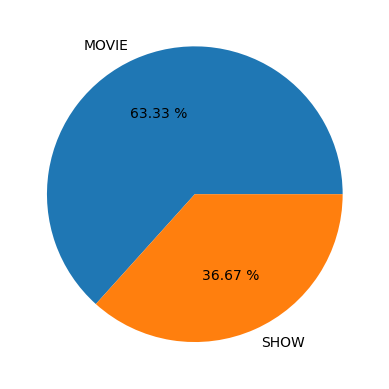

In [9]:
plt.pie(t2,labels=t2.index,autopct='%.2f %%')
plt.show()

# top 10 movies with highest runtime

In [10]:
top10_runtime=titles[['title','runtime']].sort_values('runtime',ascending=False).head(10)
top10_runtime

,title,runtime
923,Bonnie & Clyde,240
438,A Lion in the House,225
347,Lagaan: Once Upon a Time in India,224
412,Jodhaa Akbar,214
406,Kabhi Khushi Kabhie Gham,210
3076,The Irishman,209
351,No Direction Home: Bob Dylan,208
2495,Jab Harry Met Sejal,200
265,Apocalypse Now Redux,196
530,What's Your Raashee?,192


<Axes: xlabel='runtime', ylabel='title'>

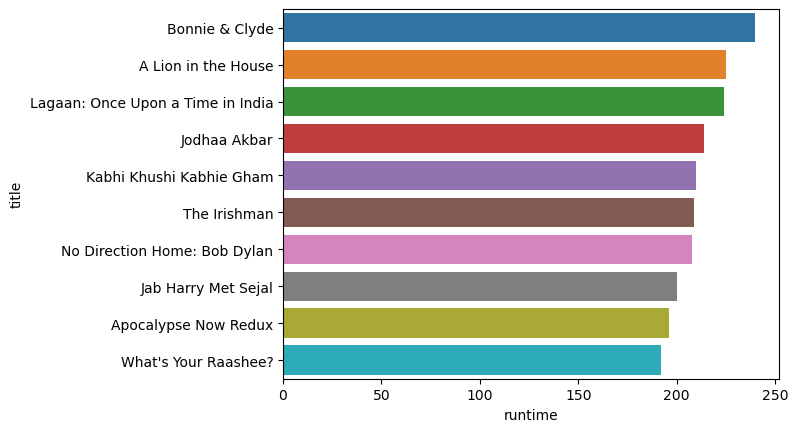

In [11]:
sns.barplot(x='runtime',y='title',data=top10_runtime)

# Find the number of movies whave the imdb rating more than 8 in the year 2022`

In [12]:
most_rated_2022=titles[(titles.imdb_score>8)&(titles.release_year==2022)]
most_rated_2022[['title','imdb_score','release_year']]


,title,imdb_score,release_year
4704,How to Change Your Mind,8.2,2022
4722,Heartstopper,8.7,2022
4739,Alchemy of Souls,8.6,2022
4767,Borgen - Power & Glory,8.2,2022
4771,Major,9.1,2022
4830,Love on the Spectrum U.S.,8.2,2022
4853,Hurts Like Hell,8.4,2022
4905,Business Proposal,8.1,2022
4921,My Liberation Notes,8.4,2022
4934,Worst Roommate Ever,8.1,2022


In [13]:
# there are inly 17 movies with the specified condition

# display the top 10 most voted movie and thier imdb score

In [14]:
t5=titles[['title','imdb_votes','imdb_score']].nlargest(10,'imdb_votes')
t5

,title,imdb_votes,imdb_score
237,Inception,2294231.0,8.8
216,Breaking Bad,1775990.0,9.5
645,The Dark Knight Rises,1669067.0,8.4
651,Django Unchained,1472668.0,8.4
239,The Departed,1296244.0,8.5
1123,Stranger Things,1101055.0,8.7
218,The Walking Dead,956604.0,8.2
226,Catch Me If You Can,952602.0,8.1
843,The Imitation Game,756254.0,8.0
267,I Am Legend,745093.0,7.2


# display the top 10 movie titles with highest imdb score

<Axes: xlabel='imdb_score', ylabel='title'>

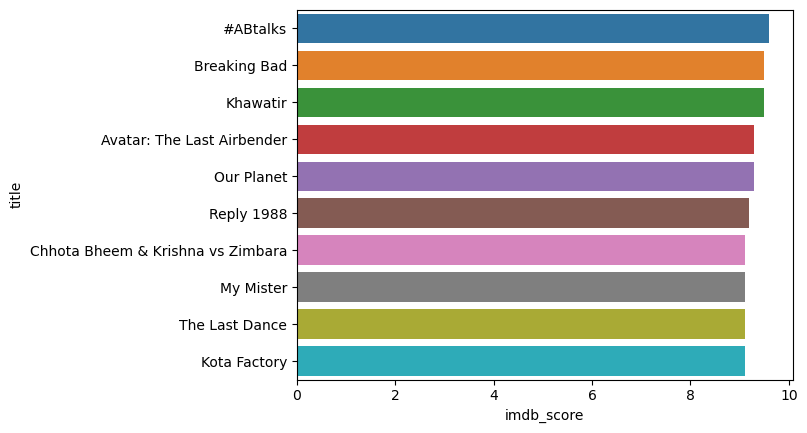

In [15]:
t6=titles[['title','imdb_score']].nlargest(10,'imdb_score')

sns.barplot(x='imdb_score',y='title',data=t6)

# 7 is there any corelation between number of votes and score

<Axes: xlabel='imdb_score', ylabel='imdb_votes'>

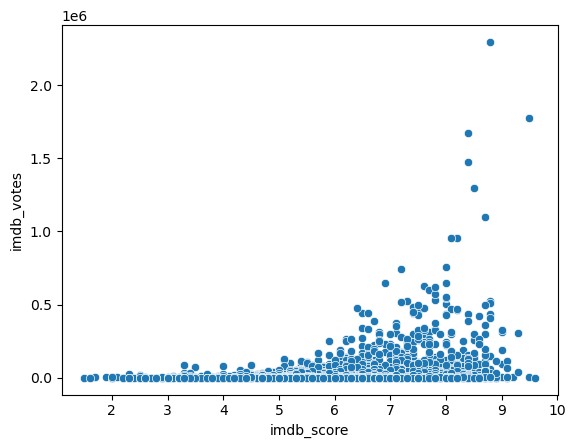

In [16]:
sns.scatterplot(y=titles.imdb_votes,x=titles.imdb_score)

In [17]:
# Yes, the more more the more the rating

# 8. display the title of the movie with the most number of seasons

In [18]:
t8=titles[['title','seasons']].nlargest(10,'seasons')

<Axes: xlabel='seasons', ylabel='title'>

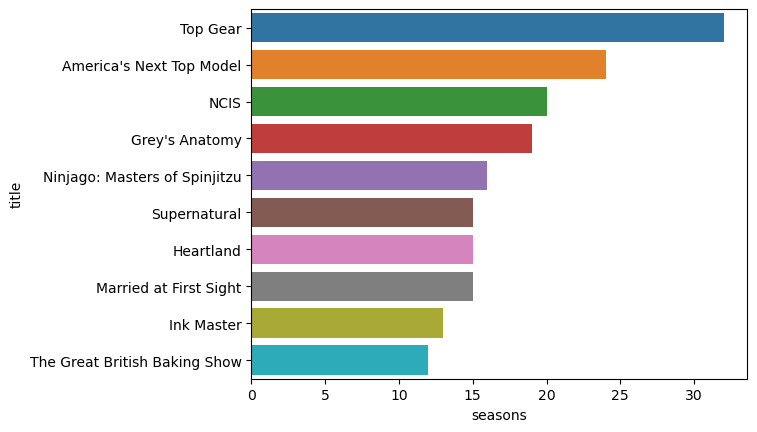

In [19]:
sns.barplot(x='seasons',y='title',data=t8)

# 9. display the title of the movie with the most number of seasons

In [20]:
t9=titles[['title','seasons']].nsmallest(10,'seasons')

<Axes: xlabel='seasons', ylabel='title'>

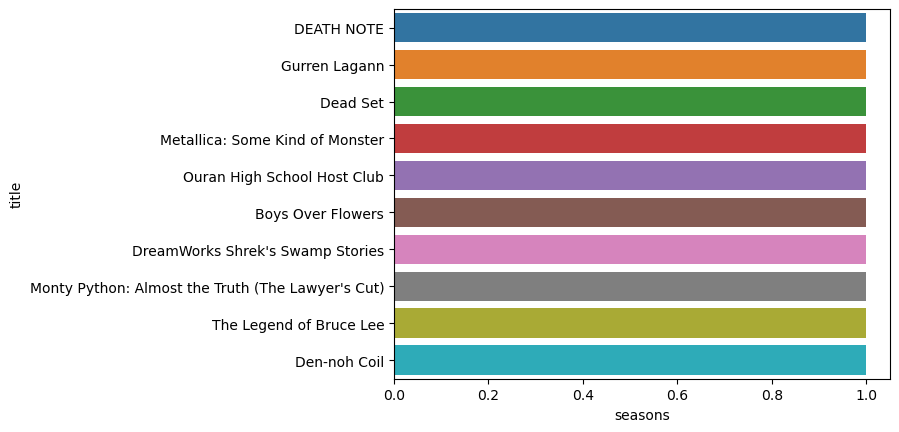

In [21]:
sns.barplot(x='seasons',y='title',data=t9)

# 10 show the distribution of runtime

In [22]:
netflix_df[:2]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,name,character,role
id,,,,,,,,,,,,,,,
tm1000037,Je suis Karl,MOVIE,2021,R,126,"['drama', 'thriller', 'european', 'romance']","['CZ', 'DE']",NaN,5.4,1077.0,12.981,5.5,Luna Wedler,Maxi,ACTOR
tm1000037,Je suis Karl,MOVIE,2021,R,126,"['drama', 'thriller', 'european', 'romance']","['CZ', 'DE']",NaN,5.4,1077.0,12.981,5.5,Jannis Niewöhner,Karl,ACTOR


<Axes: xlabel='runtime', ylabel='Count'>

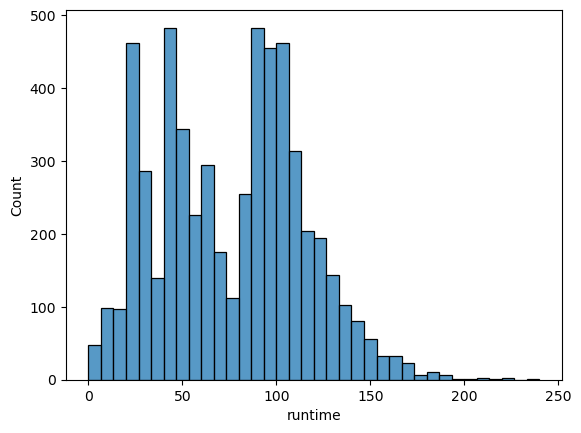

In [23]:
sns.histplot(titles.runtime)

In [24]:
titles.to_csv('netflix_2000.csv')